# Some Teams One Dream
Hand checking NBA teams from the 2014-2018 seasons

In [1]:
#acquire libraries
import pandas as pd

#explore libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from prepare import wrangle_nba_14_15, wrangle_nba_15_16, wrangle_nba_16_17, wrangle_nba_17_18

#model libraries
from model import logistic_regression, decision_tree, random_forest, kneighbors

## Acquire

In [2]:
#uploading the nba csv and saving it as a dataframe called nba
nba = pd.read_csv('nba.games.stats.csv')

In [3]:
#sneak peak into the data
nba.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [4]:
#checking to see how many rows and columns there are
nba.shape

(9840, 41)

In [5]:
#checking data types, null values, and column names
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                9840 non-null   int64  
 1   Team                      9840 non-null   object 
 2   Game                      9840 non-null   int64  
 3   Date                      9840 non-null   object 
 4   Home                      9840 non-null   object 
 5   Opponent                  9840 non-null   object 
 6   WINorLOSS                 9840 non-null   object 
 7   TeamPoints                9840 non-null   int64  
 8   OpponentPoints            9840 non-null   int64  
 9   FieldGoals                9840 non-null   int64  
 10  FieldGoalsAttempted       9840 non-null   int64  
 11  FieldGoals.               9840 non-null   float64
 12  X3PointShots              9840 non-null   int64  
 13  X3PointShotsAttempted     9840 non-null   int64  
 14  X3PointS

In [6]:
#looking at the summary statistics of all the numeric columns
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9840.0,11960.157012,18654.867508,1.000,2537.750,5141.500,7715.250,82119.000
Game,9840.0,41.500000,23.670804,1.000,21.000,41.500,62.000,82.000
TeamPoints,9840.0,103.652337,12.188043,64.000,95.000,103.000,112.000,149.000
OpponentPoints,9840.0,103.652337,12.188043,64.000,95.000,103.000,112.000,149.000
FieldGoals,9840.0,38.602439,5.029992,19.000,35.000,38.000,42.000,58.000
FieldGoalsAttempted,9840.0,84.902439,7.130043,60.000,80.000,85.000,89.000,129.000
FieldGoals.,9840.0,0.455689,0.054711,0.271,0.418,0.455,0.494,0.684
X3PointShots,9840.0,9.126829,3.598084,0.000,7.000,9.000,11.000,25.000
X3PointShotsAttempted,9840.0,25.623679,7.102501,4.000,21.000,25.000,30.000,61.000
X3PointShots.,9840.0,0.354321,0.097782,0.000,0.290,0.353,0.419,0.750


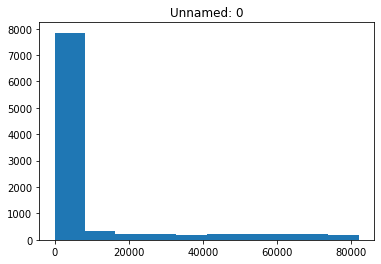

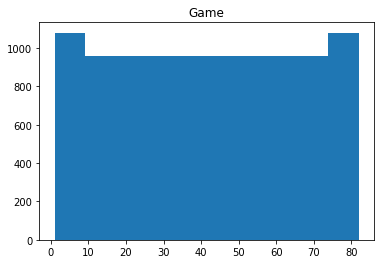

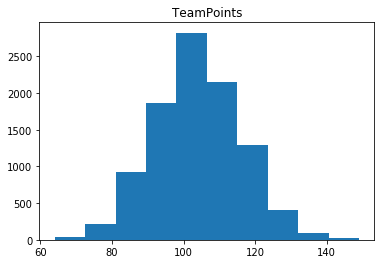

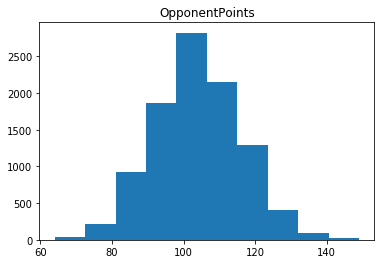

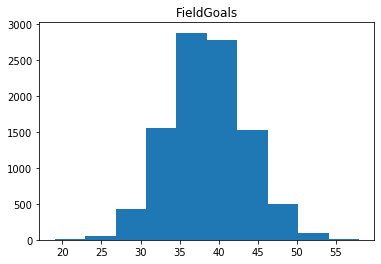

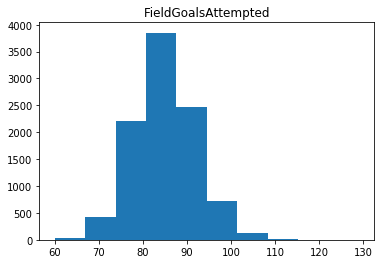

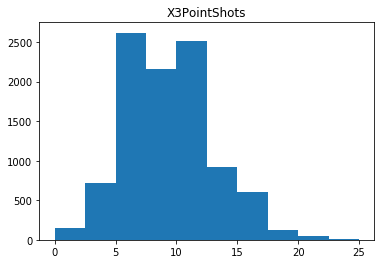

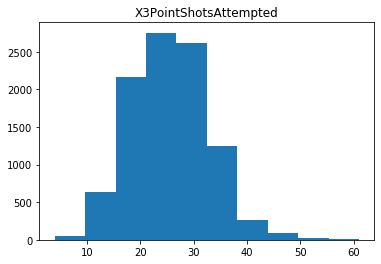

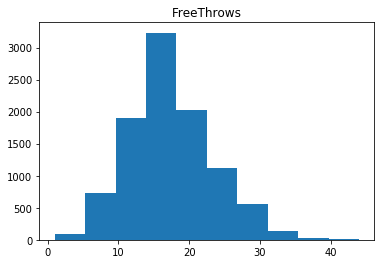

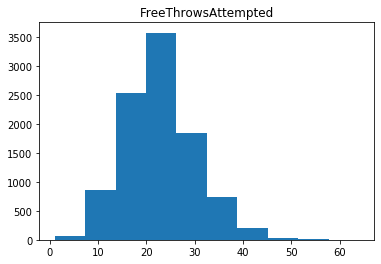

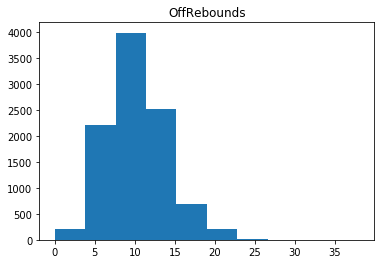

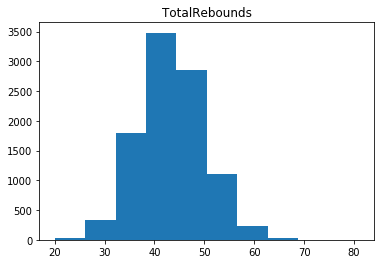

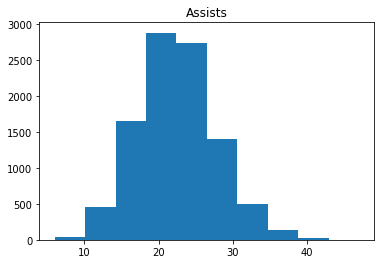

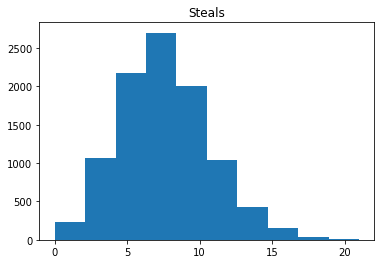

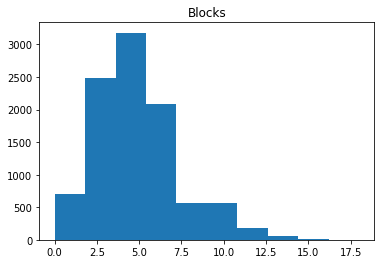

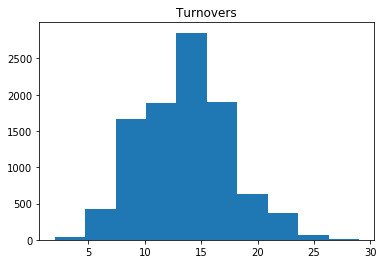

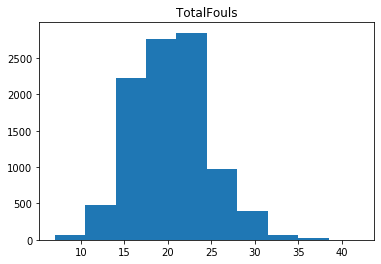

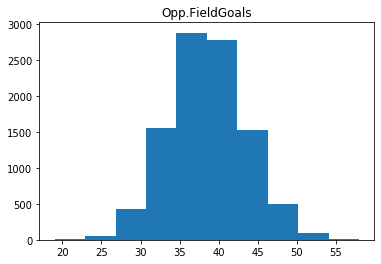

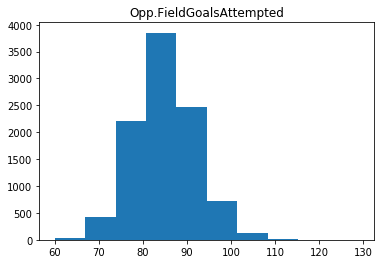

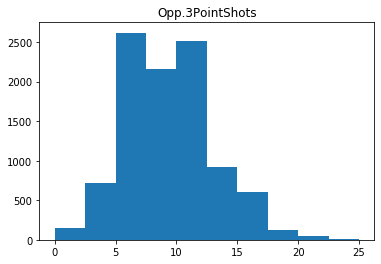

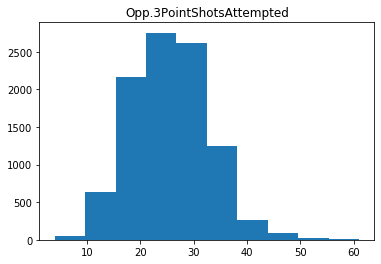

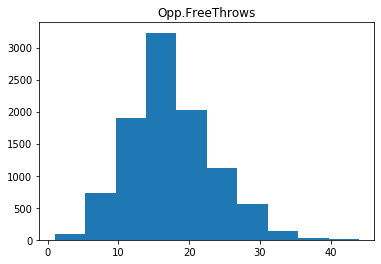

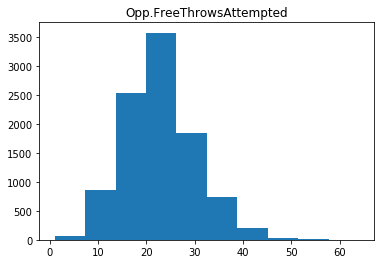

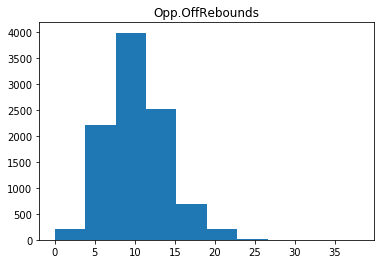

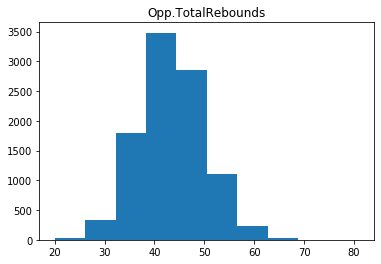

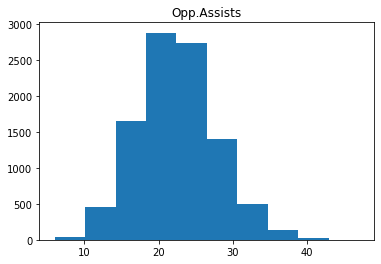

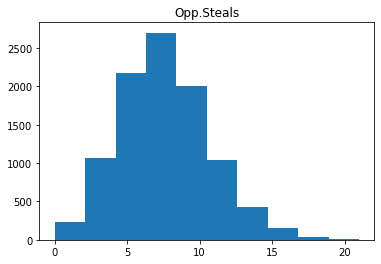

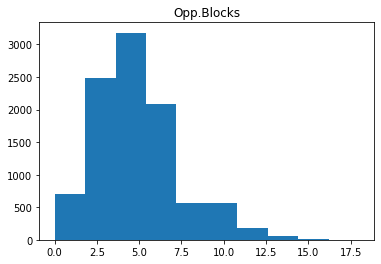

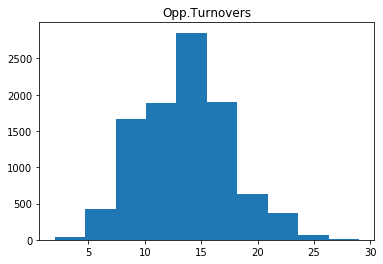

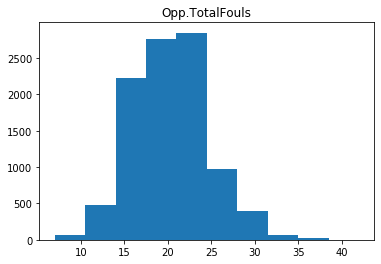

In [7]:
num_cols = nba.columns[[nba[col].dtype == 'int64' for col in nba.columns]]
for col in num_cols:
    plt.hist(nba[col])
    plt.title(col)
    plt.show()

## Prepare

- added two columns called home_is_west and away_is_west for teams playing in different conferences
- Changed Home, Conference, Opp.Conference and Wins into dummy variables
- split up whole data into seasons
- split those seasons into train, validate and test
- dropped dates and columns that deal with point totals to not skew the models to predict who wins

## Explore

In [8]:
train14, validate14, test14 = wrangle_nba_14_15()

In [9]:
train15, validate15, test15 = wrangle_nba_15_16()

In [10]:
train16, validate16, test16 = wrangle_nba_16_17()

In [11]:
train17, validate17, test17 = wrangle_nba_17_18()

### NBA 14-15 season

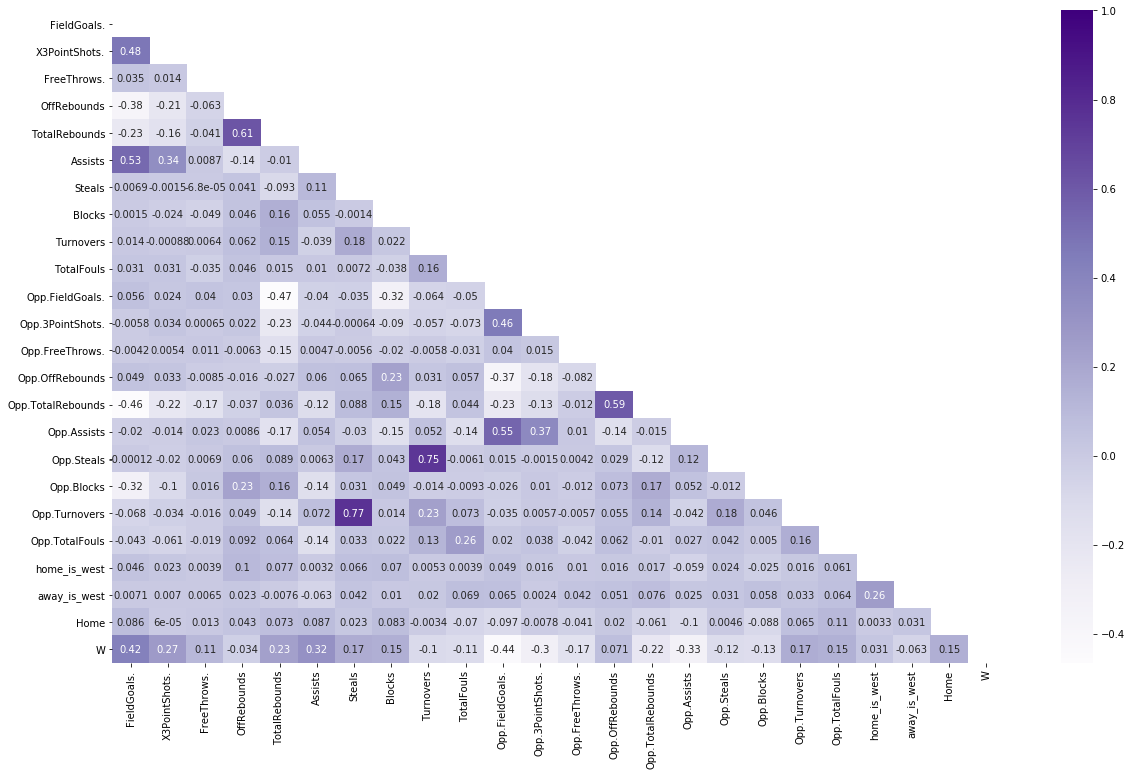

In [12]:
corr = train14.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(train14.corr(), cmap='Purples', annot=True, mask=mask)
plt.show()

- fieldgoal%, assist, 3point% and totalrebounds have the highest positive correlation
- oppfieldgoal%, oppassist, opp3point% and opptotalrebounds have lowest negative correlation
- offrebounds, oppoffrebounds, homeiswest and awayiswest seem to have no correlation

In [13]:
X_train = train14.drop(columns = ['Team', 'Opponent', 'W'])
y_train = train14.W

In [14]:
coeff, cm, class_report = logistic_regression(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AttributeError: 'Series' object has no attribute 'columns'